In [1]:
'''
Created on 2023-08-15 20:46:36
@author: caitgrasso
'''

'\nCreated on 2023-08-15 20:46:36\n@author: caitgrasso\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr, linregress
import os
import pandas as pd
from scipy.stats import ttest_ind
from matplotlib.patches import Patch

In [3]:
plt.rcParams.update({'font.size': 15, 'font.family': 'arial'})

Load data

In [4]:
BOT = 'bot_04'

# Load FC matrices
fc_before = np.loadtxt('../network_inference_data/fc_matrices/{}_before_mimat_w.csv'.format(BOT), delimiter=',')
fc_after = np.loadtxt('../network_inference_data/fc_matrices/{}_after_mimat_w.csv'.format(BOT), delimiter=',')

# Load distance matrices 
sc_before = np.loadtxt('../spatial_data/distance_matrices/distmat_{}_before_centroids.csv'.format(BOT), delimiter=',')
sc_after = np.loadtxt('../spatial_data/distance_matrices/distmat_{}_after_centroids.csv'.format(BOT), delimiter=',')


Get unique non-zero edges

In [5]:
# Get unique edges because the FC and SC mats are symmetric
fc_edges_before = fc_before[np.triu_indices(fc_before.shape[0],k=1)]
fc_edges_after = fc_after[np.triu_indices(fc_after.shape[0],k=1)]

sc_edges_after = sc_after[np.triu_indices(sc_after.shape[0],k=1)]
sc_edges_before = sc_before[np.triu_indices(sc_before.shape[0],k=1)]

# Remove edges with 0 functional connectivity
fc_edges_before_pruned = fc_edges_before[fc_edges_before!=0]
fc_edges_after_pruned = fc_edges_after[fc_edges_after!=0]

sc_edges_after_pruned = sc_edges_after[fc_edges_after!=0]
sc_edges_before_pruned = sc_edges_before[fc_edges_before!=0]

# Take log
log_sc_before = np.log10(sc_edges_before_pruned)
log_fc_before = np.log10(fc_edges_before_pruned)

log_sc_after = np.log10(sc_edges_after_pruned)
log_fc_after = np.log10(fc_edges_after_pruned)

Plot functional connectivity vs. distance between nodes and perform linear regression

bot_04 before: r=-0.219, p=0.00000
bot_04 after: r=-0.227, p=0.00000


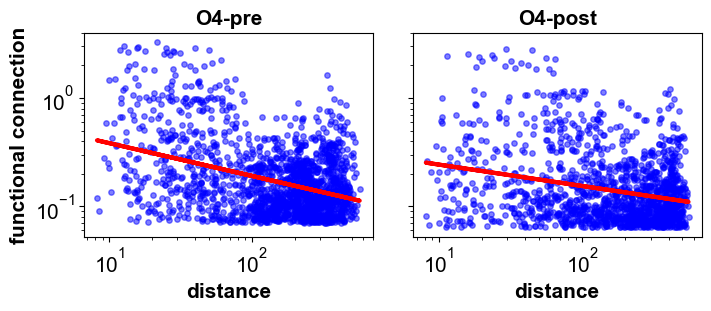

In [6]:
fig, ax = plt.subplots(1,2, figsize=(7,3), layout="constrained", sharey=True, gridspec_kw={'wspace': 0.1})

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].scatter(sc_edges_before_pruned, fc_edges_before_pruned, c='blue', s=15, alpha=0.5)
ax[1].scatter(sc_edges_after_pruned, fc_edges_after_pruned, c='blue', s=15, alpha=0.5)

# Linear regression

# Before
m,b,rvalue,pvalue, stderr = linregress(log_sc_before, log_fc_before)
# print('Before:', m, pvalue)

y_pred = b + m*log_sc_before

ax[0].plot(10**log_sc_before, 10**y_pred, 'r', linewidth=3)

# After
m,b,rvalue,pvalue, stderr = linregress(log_sc_after, log_fc_after)
# print('After:', m, pvalue)

y_pred = b + m*log_sc_after

ax[1].plot(10**log_sc_after, 10**y_pred, 'r', linewidth=3)

ax[0].set_ylabel('functional connection', fontweight='bold', fontsize=15)
ax[0].set_xlabel('distance', fontweight='bold', fontsize=15)

ax[1].set_xlabel('distance', fontweight='bold', fontsize=15)

# ax[0].set_title('pre-damage', fontweight='bold', fontsize=15)
# ax[1].set_title('post-damage', fontweight='bold', fontsize=15)

ax[0].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)

# ax[0].annotate('O4-pre', xy=(1, 1),  # Coordinates for the bottom right corner
#         xycoords='axes fraction',  # Use axes fraction for specifying coordinates
#         xytext=(-10, -15),  # Offset of the text from the specified coordinates
#         textcoords='offset points',  # Use offset points for specifying text offset
#         ha='right',  # Horizontal alignment
#         va='bottom',  # Vertical alignment
#         fontsize=12,  # Adjust the font size as needed
#         fontweight='bold',
#         style='italic',
#         bbox=dict(boxstyle='square,pad=0.2', edgecolor='gainsboro', facecolor='gainsboro'))
ax[0].set_title('O4-pre', fontsize=15, fontweight='bold')

# ax[1].annotate('O4-post', xy=(1, 1),  # Coordinates for the bottom right corner
#         xycoords='axes fraction',  # Use axes fraction for specifying coordinates
#         xytext=(-10, -15),  # Offset of the text from the specified coordinates
#         textcoords='offset points',  # Use offset points for specifying text offset
#         ha='right',  # Horizontal alignment
#         va='bottom',  # Vertical alignment
#         fontsize=12,  # Adjust the font size as needed
#         fontweight='bold',
#         style='italic',
#         bbox=dict(boxstyle='square,pad=0.2', edgecolor='gainsboro', facecolor='gainsboro'))
ax[1].set_title('O4-post', fontsize=15, fontweight='bold')

stat1, p1 = spearmanr(sc_edges_before_pruned, fc_edges_before_pruned)
stat2, p2 = pearsonr(sc_edges_after_pruned, fc_edges_after_pruned)
print(f'{BOT} before: r={stat1:.3f}, p={p1:.5f}')
print(f'{BOT} after: r={stat2:.3f}, p={p2:.5f}')

# os.makedirs('../network_analysis_data/spearman_correlations/',exist_ok=True)
# df = pd.DataFrame({'network':[f'{BOT}_before',f'{BOT}_after'], 'correlation_coefficient':[stat1, stat2], 'pvalue':[p1,p2]})
# df.to_csv(f'../network_analysis_data/spearman_correlations/{BOT}_unwhitened_fc_distance_correlation.csv', sep=',')

# os.makedirs('../results/fc_distance_plots/',exist_ok=True)
# plt.savefig(f'../results/fc_distance_plots/{BOT}_unwhitened_fc_distance_scatter_spearman.png', dpi=500, bbox_inches='tight')
plt.savefig(f'../../../Desktop/{BOT}_fc_distance_plots.png', dpi=500, bbox_inches='tight')
plt.show()

Aggregate plot

In [6]:
BOTS = ['bot_01', 'bot_02', 'bot_03', 'bot_04', 'bot_05', 'bot_06']
fc_distance_corrs = {}
fc_distance_corrs['before'] = []
fc_distance_corrs['after'] = []

for BOT in BOTS:
    spearman_df = pd.read_csv(f'../network_analysis_data/spearman_correlations/{BOT}_fc_distance_correlation.csv')
    fc_distance_corrs['before'].append(float(spearman_df[spearman_df['network']==f'{BOT}_before']['correlation_coefficient']))
    fc_distance_corrs['after'].append(float(spearman_df[spearman_df['network']==f'{BOT}_after']['correlation_coefficient']))

In [7]:
stat, p = ttest_ind(fc_distance_corrs['before'], fc_distance_corrs['after'])
print(p)

0.267111321356865


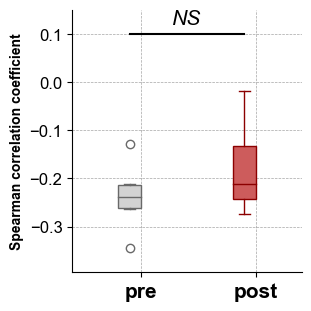

In [8]:
fig, ax = plt.subplots(figsize=(3,3),layout='constrained')

width = 0.2
multiplier = 0

ticks = ['pre', 'post']

before_x = [1]
before_plot = plt.boxplot(fc_distance_corrs['before'],
                            positions=before_x, widths=0.2, patch_artist=True)

after_x = [2]
after_plot = plt.boxplot(fc_distance_corrs['after'],
                            positions=after_x, widths=0.2, patch_artist=True)

for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(before_plot[item], color='dimgray') 
plt.setp(before_plot["boxes"], facecolor = 'lightgray')
plt.setp(before_plot["fliers"], markeredgecolor='dimgray')

for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(after_plot[item], color='darkred')
plt.setp(after_plot["boxes"], facecolor = 'indianred')
plt.setp(after_plot["fliers"], markeredgecolor='darkred')

miny = np.min((np.min(fc_distance_corrs['before']),np.min(fc_distance_corrs['after'])))

h = 0.1
xticks = [1.1, 2.1]
plt.xticks(xticks, ticks, fontweight='bold', fontsize=15)
plt.ylim([miny-0.05, h+0.05])
ax.tick_params(axis='y', which='major', labelsize=12)


plt.ylabel('Spearman correlation coefficient', fontweight='bold', fontsize=10)

# Statistical annotations
ax.plot((before_x[0],after_x[0]),(h, h),'k')

if p<0.001:
    text = 'p<0.001'  
elif p<0.01:
    text = 'p<0.01' 
elif p<0.05:
    text = 'p<0.05' 
else:
    text = 'NS'

ax.text(1.5, h+0.02, text, style='italic', ha='center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')

# handles = [Patch(facecolor='lightgray', edgecolor='dimgray', label='before'), 
#         Patch(facecolor='indianred', edgecolor='darkred', label='after')]

# ax.legend(handles=handles, handlelength=2, handleheight=1, frameon=False, bbox_to_anchor=(1.05, 1.0), loc='upper left',
#             borderaxespad=0, fontsize=13)
# plt.savefig('../results/phase_comparisons/spearman_corr.png', dpi=300, bbox_inches='tight')
plt.savefig(f'../../../Desktop/fc_distance_aggregate.png', dpi=500, bbox_inches='tight')
plt.show()